<a href="https://colab.research.google.com/github/MachineAbiogenesis/MachineLearning/blob/main/BTC_graph_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd


In [ ]:
BTC_data=pd.read_csv('/content/BTC-USD-15-MIN.csv',delimiter=',')

In [ ]:
BTC_data.tail()

,Datetime,Open,High,Low,Close,Adj Close,Volume
5849,2021-11-27 05:15:00+00:00,54493.636719,54521.902344,54429.992188,54468.933594,54468.933594,26304512
5850,2021-11-27 05:30:00+00:00,54459.839844,54548.804688,54459.839844,54461.289062,54461.289062,17096704
5851,2021-11-27 05:45:00+00:00,54479.828125,54526.691406,54305.835938,54305.835938,54305.835938,8499200
5852,2021-11-27 06:00:00+00:00,54290.449219,54290.449219,54290.449219,54290.449219,54290.449219,0
5853,2021-11-27 06:01:03+00:00,54417.066406,54417.066406,54417.066406,54417.066406,54417.066406,0


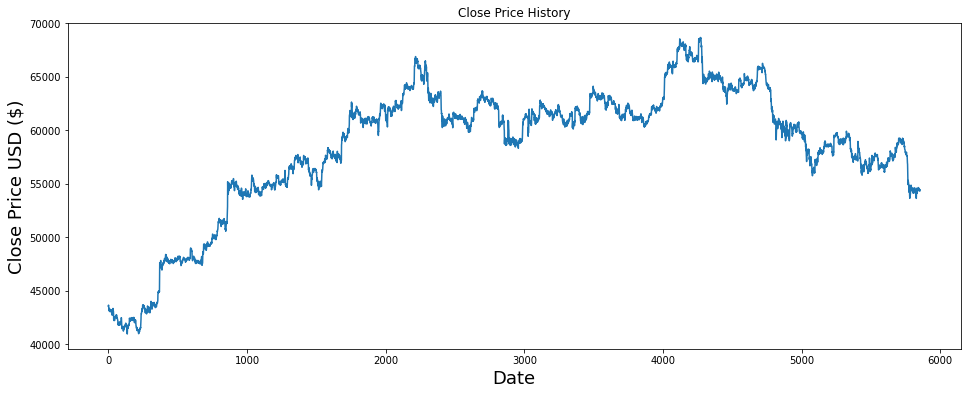

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(BTC_data['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
import numpy as np
import math

tesla_close=[[x/100000] for x in BTC_data['Close'] if math.isnan(x) == False]


In [ ]:

from sklearn.preprocessing import MinMaxScaler

scaled_data = tesla_close

In [ ]:
train_len=(int(len(scaled_data)*85/100))

train_data=scaled_data[0:train_len]
test_data=scaled_data[train_len:-1]

In [ ]:
train_data[:-10]

[[0.435487734375],
 [0.4356748046875],
 [0.4363110546875],
 [0.434438203125],
 [0.4318646875],
 [0.431083046875],
 [0.4320184375],
 [0.431218046875],
 [0.433276640625],
 [0.432957890625],
 [0.4324236328125],
 [0.431207109375],
 [0.430298984375],
 [0.43137203125],
 [0.430360390625],
 [0.4312565625],
 [0.43053234375],
 [0.4318596875],
 [0.43188875],
 [0.430395625],
 [0.4302701953125],
 [0.4311080859375],
 [0.43095484375],
 [0.4317902734375],
 [0.4306951953125],
 [0.42783],
 [0.4289142578125],
 [0.428845390625],
 [0.426929296875],
 [0.427855078125],
 [0.4290698828125],
 [0.429833046875],
 [0.430859609375],
 [0.431551953125],
 [0.4332388671875],
 [0.4313928515625],
 [0.4312981640625],
 [0.4305775],
 [0.428308203125],
 [0.42282765625],
 [0.4223573046875],
 [0.4219181640625],
 [0.42278140625],
 [0.4239547265625],
 [0.4229271484375],
 [0.421984921875],
 [0.4222334375],
 [0.42491625],
 [0.425331171875],
 [0.42563046875],
 [0.425603515625],
 [0.4245272265625],
 [0.424865078125],
 [0.42503558593

In [ ]:
test_data[:10]

[[0.6052938671875],
 [0.6049028515625],
 [0.605222109375],
 [0.606451484375],
 [0.6076963671875],
 [0.6045148828125],
 [0.6029066796875],
 [0.6019673046875],
 [0.599431953125],
 [0.59928609375]]

In [ ]:
#creating Labels and data:

x_train = []
y_train = []


for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i])
    y_train.append(train_data[i])






In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)



In [ ]:
x_train.shape,y_train

((4915, 60, 1), array([[0.42700445],
        [0.42423566],
        [0.42515973],
        ...,
        [0.60298453],
        [0.60298531],
        [0.6069091 ]]))

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
x_train[1],y_train[1]

(array([[0.4356748 ],
        [0.43631105],
        [0.4344382 ],
        [0.43186469],
        [0.43108305],
        [0.43201844],
        [0.43121805],
        [0.43327664],
        [0.43295789],
        [0.43242363],
        [0.43120711],
        [0.43029898],
        [0.43137203],
        [0.43036039],
        [0.43125656],
        [0.43053234],
        [0.43185969],
        [0.43188875],
        [0.43039563],
        [0.4302702 ],
        [0.43110809],
        [0.43095484],
        [0.43179027],
        [0.4306952 ],
        [0.42783   ],
        [0.42891426],
        [0.42884539],
        [0.4269293 ],
        [0.42785508],
        [0.42906988],
        [0.42983305],
        [0.43085961],
        [0.43155195],
        [0.43323887],
        [0.43139285],
        [0.43129816],
        [0.4305775 ],
        [0.4283082 ],
        [0.42282766],
        [0.4223573 ],
        [0.42191816],
        [0.42278141],
        [0.42395473],
        [0.42292715],
        [0.42198492],
        [0

In [ ]:
BTC_prediction=tf.keras.Sequential([
                                    tf.keras.layers.LSTM(32,return_sequences=True),
                                    tf.keras.layers.LSTM(16),
                                    tf.keras.layers.Dense(16),
                                    tf.keras.layers.Dense(1)
                                    
])

BTC_prediction.compile(
    loss=tf.keras.losses.mean_squared_error,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mean_squared_error']

)


In [ ]:
BTC_prediction.fit(x_train,y_train,epochs=10)

Epoch 1/10
154/154 [==============================] - 12s 47ms/step - loss: 0.0132 - mean_squared_error: 0.0132
Epoch 2/10
154/154 [==============================] - 7s 47ms/step - loss: 2.3039e-04 - mean_squared_error: 2.3039e-04
Epoch 3/10
154/154 [==============================] - 7s 48ms/step - loss: 3.0996e-05 - mean_squared_error: 3.0996e-05
Epoch 4/10
154/154 [==============================] - 7s 46ms/step - loss: 2.6316e-05 - mean_squared_error: 2.6316e-05
Epoch 5/10
154/154 [==============================] - 7s 47ms/step - loss: 2.6990e-05 - mean_squared_error: 2.6990e-05
Epoch 6/10
154/154 [==============================] - 7s 47ms/step - loss: 2.6299e-05 - mean_squared_error: 2.6299e-05
Epoch 7/10
154/154 [==============================] - 7s 47ms/step - loss: 2.8043e-05 - mean_squared_error: 2.8043e-05
Epoch 8/10
154/154 [==============================] - 8s 49ms/step - loss: 2.7083e-05 - mean_squared_error: 2.7083e-05
Epoch 9/10
154/154 [==============================] - 7

In [ ]:
test_data

[[0.6052938671875],
 [0.6049028515625],
 [0.605222109375],
 [0.606451484375],
 [0.6076963671875],
 [0.6045148828125],
 [0.6029066796875],
 [0.6019673046875],
 [0.599431953125],
 [0.59928609375],
 [0.5979231640625],
 [0.5981798046875],
 [0.598405625],
 [0.597025390625],
 [0.5980311328125],
 [0.5990234375],
 [0.597900703125],
 [0.5975326171875],
 [0.5986296875],
 [0.598214609375],
 [0.59922578125],
 [0.597577890625],
 [0.596357578125],
 [0.5974183984375],
 [0.597695625],
 [0.59622109375],
 [0.5973462890625],
 [0.5960701953125],
 [0.5957931640625],
 [0.5939563671875],
 [0.5924826171875],
 [0.5931790234375],
 [0.5930712109375],
 [0.591554453125],
 [0.593959375],
 [0.5961994921875],
 [0.598095546875],
 [0.598396015625],
 [0.5980534375],
 [0.595330078125],
 [0.5929369921875],
 [0.5948115234375],
 [0.59543796875],
 [0.5933823828125],
 [0.5910987890625],
 [0.5910896484375],
 [0.5893216796875],
 [0.5954448046875],
 [0.5914659765625],
 [0.589787890625],
 [0.590321171875],
 [0.5888590625],
 [0.59

In [ ]:

# Create the data sets x_test and y_test
x_test = []

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = BTC_prediction.predict(x_test)

predictions_list=[[item] for item in predictions[:,0]]



In [ ]:
x_test

array([[[0.60529387],
        [0.60490285],
        [0.60522211],
        ...,
        [0.58409434],
        [0.57911402],
        [0.57570895]],

       [[0.60490285],
        [0.60522211],
        [0.60645148],
        ...,
        [0.57911402],
        [0.57570895],
        [0.5739359 ]],

       [[0.60522211],
        [0.60645148],
        [0.60769637],
        ...,
        [0.57570895],
        [0.5739359 ],
        [0.57063168]],

       ...,

       [[0.5475941 ],
        [0.54726965],
        [0.54494336],
        ...,
        [0.54548582],
        [0.54506242],
        [0.54468934]],

       [[0.54726965],
        [0.54494336],
        [0.54523914],
        ...,
        [0.54506242],
        [0.54468934],
        [0.54461289]],

       [[0.54494336],
        [0.54523914],
        [0.54475852],
        ...,
        [0.54468934],
        [0.54461289],
        [0.54305836]]])

In [ ]:

predictions_list

[[0.5889877],
 [0.58788586],
 [0.5866194],
 [0.5855553],
 [0.58469975],
 [0.58385974],
 [0.5830956],
 [0.5824356],
 [0.58188117],
 [0.58147216],
 [0.5811974],
 [0.5810407],
 [0.58099306],
 [0.5809525],
 [0.580853],
 [0.5807881],
 [0.58078015],
 [0.58079976],
 [0.5808829],
 [0.5809041],
 [0.5808525],
 [0.5806788],
 [0.58032817],
 [0.5799518],
 [0.5793855],
 [0.5786897],
 [0.57787013],
 [0.5770438],
 [0.576191],
 [0.57543296],
 [0.5748925],
 [0.5743954],
 [0.57411456],
 [0.573974],
 [0.5738734],
 [0.5736887],
 [0.57345796],
 [0.5731612],
 [0.57284456],
 [0.57250077],
 [0.5720155],
 [0.5713361],
 [0.5706347],
 [0.5698437],
 [0.5689374],
 [0.56806856],
 [0.56723225],
 [0.56651074],
 [0.56592464],
 [0.56548345],
 [0.5651543],
 [0.5648181],
 [0.5646092],
 [0.5645159],
 [0.56447273],
 [0.5644368],
 [0.56439745],
 [0.5643854],
 [0.5643197],
 [0.564159],
 [0.563975],
 [0.5637694],
 [0.5636802],
 [0.563945],
 [0.56440735],
 [0.5649035],
 [0.56548464],
 [0.5661092],
 [0.5667448],
 [0.5673426],
 [

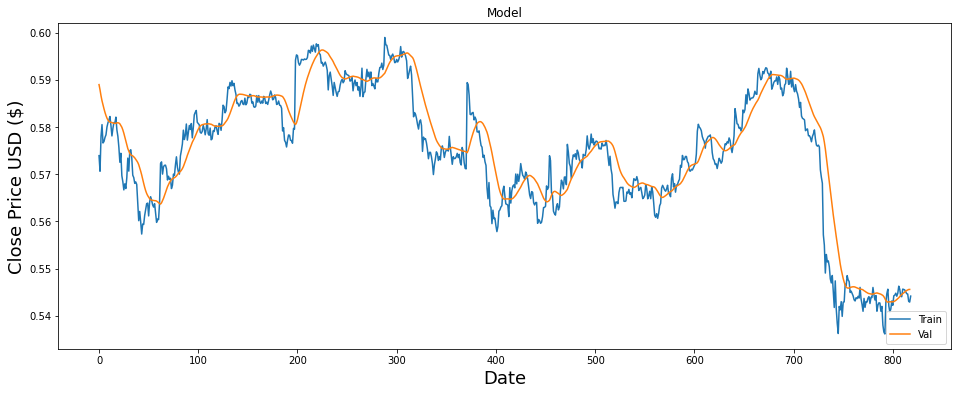

In [ ]:
train_plot = tesla_close[:]
valid_plot = tesla_close[train_len:]
pred_plot = predictions_list
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

plt.plot(valid_plot[60:])
plt.plot(pred_plot)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()